# How are the study tiles clustered in the embedding space?

In this notebook you will work with 500 embedding vectors (with length `100`) produced for a *study* dataset of 500 tiles. The aim is to answer questions like:

1. Are there are finite number of distinct clusters of tiles in the embedding space?

2. How do different clustering algorithms work and what insight can they give us?

As time permits the examples below give some suggestions on how to explore the embedding space using:

- [K-means](https://scikit-learn.org/stable/modules/clustering.html#k-means): number of clusters is parameter, not guaranteed to exist inside of each other as number of clusters is increased
- [Hierarchical clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering): number of clusters is parameter, clusters sub-devided as number of clusters is increased

- [OPTICS](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html#sklearn.cluster.OPTICS): density-based clustering, number of clusters is not prescribed

You are also very welcome to pick a [different clustering algorithm](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods) from scikit-learn

Note: Although all the analysis in this notebook can be carried out without installing `convml-tt` (and all its dependencies) the plotting routines in there make it easier to visiualise the tiles you will be looking at.

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

import convml_tt
import convml_tt.interpretation.plots
import convml_tt.interpretation.plots
from convml_tt.data.examples import (
    fetch_example_dataset,
    ExampleData,
)
from convml_tt.data.dataset import ImageSingletDataset, TileType

xr.__version__, convml_tt.__version__

('0.21.1', '0.12.0')

In [2]:
# load the embeddings you created in exercises 1a) with the trained model
fn = Path("fixednorm-stage-2.emb.nc")
if not fn.exists():
    da_embs = get_embeddings(tile_dataset=dataset, model=model)
    da_embs.to_netcdf(fn)
else:
    da_embs = xr.open_dataarray(fn)

In [3]:
# we'll load the dataset too so that we have access to the tile images
# and can plot them to visualise the clusters we create
data_path = fetch_example_dataset(dataset=ExampleData.LARGE2000S500)
dataset = ImageSingletDataset(
    stage="study",
    data_dir=data_path,
    tile_type=TileType.ANCHOR,
)

Using downloaded and verified file: data/Nx256_s200000.0_N500study_N2000train.tgz
Extracting data/Nx256_s200000.0_N500study_N2000train.tgz to data/


## 1. K-means clustering

In [4]:
from sklearn.cluster import KMeans

In [5]:
# run KMeans clustering with a fixed number of clusters
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit_transform(da_embs)

# create an xarray.DataArray to make this array easier to work with
da_embs_kmeans = xr.DataArray(
    kmeans.labels_,
    dims=("tile_id",),
    coords=dict(tile_id=da_embs.tile_id),
    attrs=da_embs.attrs,
)
da_embs_kmeans

<xarray.DataArray (tile_id: 500)>
array([3, 0, 1, 3, 1, 0, 3, 1, 1, 3, 3, 3, 3, 4, 1, 0, 0, 2, 3, 0, 1, 1,
       1, 4, 1, 1, 1, 3, 0, 3, 0, 3, 1, 1, 3, 0, 1, 3, 4, 1, 1, 4, 1, 0,
       1, 1, 3, 4, 1, 0, 3, 0, 3, 0, 4, 0, 0, 1, 0, 0, 3, 3, 2, 0, 0, 1,
       3, 1, 4, 1, 0, 1, 1, 3, 1, 1, 3, 0, 3, 1, 0, 0, 1, 0, 3, 3, 3, 2,
       3, 1, 3, 1, 3, 3, 1, 1, 3, 0, 1, 1, 2, 0, 1, 0, 4, 3, 1, 4, 3, 1,
       1, 1, 2, 4, 1, 0, 1, 1, 1, 4, 0, 0, 1, 0, 3, 1, 0, 1, 1, 2, 3, 0,
       0, 1, 1, 1, 4, 0, 3, 3, 0, 1, 0, 3, 1, 4, 1, 1, 1, 4, 0, 1, 2, 3,
       3, 4, 3, 1, 2, 0, 0, 0, 4, 0, 1, 3, 1, 3, 1, 1, 0, 2, 1, 4, 1, 1,
       3, 0, 1, 1, 3, 0, 4, 1, 0, 0, 3, 4, 3, 0, 1, 0, 0, 3, 1, 1, 0, 1,
       0, 4, 1, 4, 2, 2, 1, 0, 3, 0, 4, 1, 1, 2, 3, 1, 3, 0, 1, 1, 0, 1,
       1, 2, 0, 3, 3, 1, 2, 0, 0, 3, 1, 0, 1, 0, 1, 3, 3, 0, 1, 1, 3, 1,
       1, 3, 3, 1, 4, 3, 0, 3, 4, 2, 0, 3, 0, 0, 1, 3, 3, 0, 2, 2, 1, 0,
       4, 2, 1, 0, 3, 3, 1, 3, 1, 3, 3, 4, 1, 2, 1, 1, 3, 0, 4, 2, 1, 1,
       0, 2, 1, 3, 1, 3, 0, 4, 0, 2, 2, 0, 3, 3, 3, 1, 4, 0, 1, 3, 4, 2,
       1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1, 1, 3,
       0, 0, 1, 4, 1, 1, 3, 3, 1, 1, 0, 0, 1, 1, 2, 3, 3, 0, 1, 2, 1, 1,
       1, 0, 1, 1, 3, 3, 1, 0, 2, 2, 4, 0, 1, 0, 1, 0, 3, 0, 0, 1, 1, 3,
       1, 1, 1, 3, 0, 4, 0, 0, 4, 1, 1, 1, 4, 1, 0, 1, 1, 3, 4, 1, 1, 4,
       1, 4, 1, 1, 1, 1, 1, 4, 4, 1, 1, 3, 3, 1, 1, 4, 1, 3, 0, 3, 3, 0,
       1, 2, 3, 0, 0, 1, 3, 3, 3, 1, 0, 1, 1, 1, 0, 3, 1, 1, 0, 3, 3, 0,
       0, 1, 1, 3, 0, 4, 1, 3, 1, 0, 3, 1, 1, 1, 2, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 1, 3, 0, 0, 0, 3, 3, 4, 0, 0, 1, 1, 4, 0, 1, 3, 3, 3, 2, 4,
       1, 1, 2, 3, 4, 0, 1, 3, 0, 0, 3, 4, 0, 0, 3, 1], dtype=int32)
Coordinates:
  * tile_id  (tile_id) int64 0 1 2 3 4 5 6 7 ... 492 493 494 495 496 497 498 499
Attributes:
    tile_type:  ANCHOR
    stage:      study
    data_dir:   /mnt/speedy/projects/sense-training/SENSE_convml_tt/notebooks...

<BarContainer object of 5 artists>

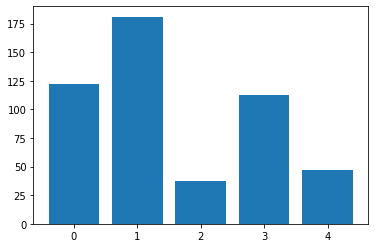

In [6]:
# how many are there in each cluster?
plt.bar(*np.unique(da_embs_kmeans, return_counts=True))

/mnt/big/envs/envs/convml-tt-sense-gpu/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


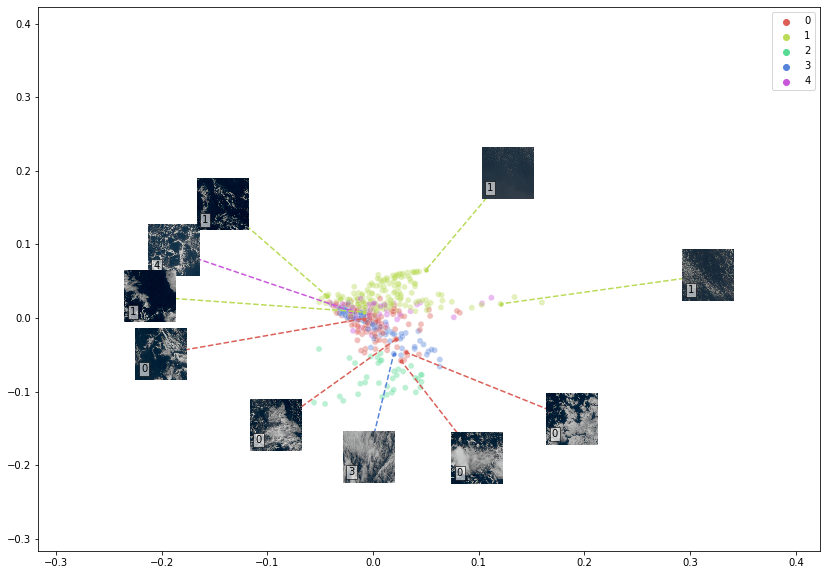

In [7]:
# plot the first two embedding dimensions against each other, annotated with 10 random tiles

fig, ax = plt.subplots(figsize=(14, 10))
x = da_embs.sel(emb_dim=0)
y = da_embs.sel(emb_dim=3)

_ = convml_tt.interpretation.plots.annotated_scatter_plot(
    x, y, points=10, ax=ax, hue=da_embs_kmeans, hue_palette="hls", size=0.2
)

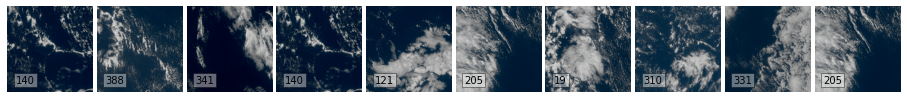

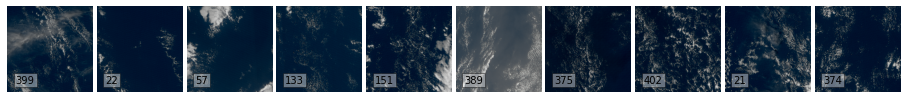

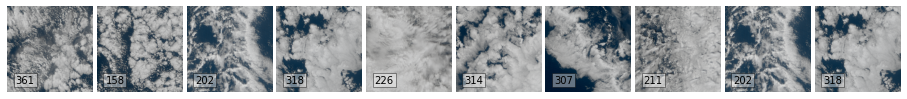

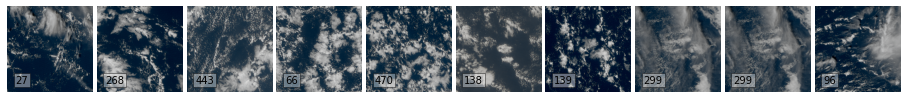

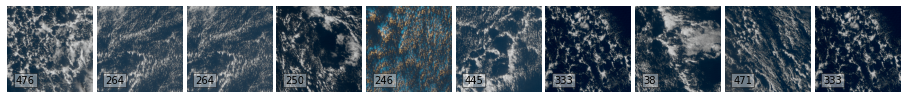

In [8]:
# plot 10 examples from each cluster

for n in np.unique(da_embs_kmeans):
    idxs = np.random.choice(
        da_embs_kmeans.where(da_embs_kmeans == n, drop=True).tile_id, 10
    )
    convml_tt.interpretation.plots.grid_overview(tile_dataset=dataset, points=idxs)

## 2. Hierarchical clustering

Although the hierarchical clustering below uses the methods in scikit-learn I created my own routine to produce a dendrogram with tile examples below. You may simply use `sklearn.cluster.AgglomerativeClustering` directly (in a similar way to how `KMeans` was used above) and skip making a dendrogram.

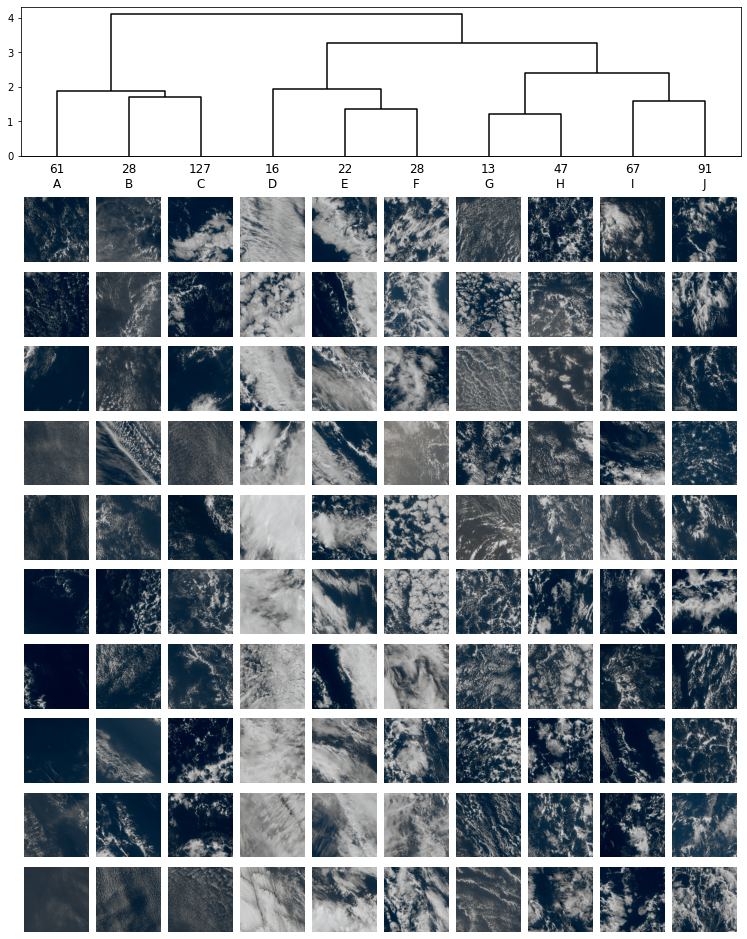

In [9]:
# make a dendrogram plot
fig, da_clusters = convml_tt.interpretation.plots.dendrogram(
    da_embs, return_clusters=True, label_clusters=True, n_clusters_max=10
)

In [10]:
da_clusters

<xarray.DataArray (tile_id: 500)>
array(['F', 'I', 'A', 'J', 'C', 'I', 'J', 'C', 'C', 'J', 'J', 'J', 'J',
       'G', 'C', 'I', 'I', 'F', 'J', 'F', 'C', 'C', 'A', 'G', 'A', 'B',
       'A', 'J', 'C', 'J', 'I', 'J', 'A', 'C', 'J', 'I', 'C', 'J', 'H',
       'C', 'C', 'H', 'C', 'C', 'C', 'C', 'H', 'H', 'C', 'C', 'J', 'C',
       'J', 'E', 'H', 'I', 'C', 'C', 'I', 'I', 'J', 'J', 'E', 'I', 'C',
       'C', 'J', 'C', 'H', 'A', 'F', 'B', 'A', 'H', 'C', 'C', 'J', 'I',
       'H', 'A', 'I', 'C', 'C', 'I', 'J', 'J', 'J', 'D', 'J', 'C', 'J',
       'C', 'J', 'J', 'A', 'A', 'J', 'E', 'C', 'C', 'D', 'I', 'A', 'C',
       'G', 'J', 'C', 'G', 'J', 'A', 'C', 'C', 'F', 'H', 'C', 'I', 'A',
       'A', 'A', 'H', 'I', 'C', 'A', 'I', 'J', 'A', 'C', 'B', 'B', 'D',
       'J', 'I', 'J', 'A', 'A', 'A', 'H', 'C', 'H', 'J', 'C', 'B', 'C',
       'J', 'C', 'H', 'A', 'C', 'C', 'H', 'C', 'C', 'E', 'H', 'J', 'G',
       'J', 'C', 'F', 'I', 'I', 'I', 'H', 'E', 'C', 'J', 'A', 'J', 'C',
       'A', 'I', 'D', 'A', 'H', 'A', 'C', 'J', 'I', 'B', 'C', 'J', 'B',
       'H', 'A', 'I', 'E', 'J', 'B', 'J', 'I', 'A', 'C', 'I', 'F', 'C',
       'C', 'C', 'B', 'C', 'B', 'C', 'H', 'F', 'D', 'C', 'I', 'J', 'I',
       'H', 'A', 'C', 'D', 'J', 'C', 'J', 'E', 'C', 'C', 'J', 'C', 'C',
       'E', 'C', 'I', 'I', 'C', 'D', 'C', 'I', 'H', 'C', 'I', 'C', 'E',
       'A', 'H', 'J', 'E', 'C', 'C', 'J', 'C', 'C', 'J', 'J', 'C', 'H',
       'H', 'F', 'J', 'H', 'D', 'I', 'J', 'I', 'B', 'A', 'F', 'J', 'F',
       'F', 'F', 'B', 'E', 'J', 'D', 'C', 'I', 'H', 'J', 'C', 'H', 'C',
       'J', 'J', 'B', 'B', 'F', 'A', 'A', 'H', 'I', 'G', 'D', 'A', 'C',
       'I', 'F', 'C', 'H', 'C', 'J', 'I', 'H', 'I', 'D', 'F', 'C', 'J',
       'J', 'J', 'A', 'G', 'E', 'C', 'J', 'G', 'E', 'A', 'I', 'I', 'C',
       'D', 'E', 'D', 'C', 'A', 'B', 'D', 'I', 'F', 'I', 'E', 'E', 'B',
       'B', 'C', 'C', 'C', 'J', 'I', 'I', 'C', 'H', 'A', 'A', 'J', 'J',
       'A', 'C', 'C', 'I', 'A', 'A', 'E', 'J', 'J', 'E', 'A', 'D', 'C',
       'C', 'C', 'I', 'C', 'C', 'J', 'J', 'A', 'I', 'F', 'F', 'H', 'C',
       'C', 'E', 'A', 'E', 'F', 'I', 'I', 'A', 'C', 'J', 'A', 'A', 'B',
       'H', 'J', 'G', 'B', 'I', 'G', 'A', 'B', 'B', 'H', 'B', 'I', 'C',
       'A', 'J', 'H', 'C', 'C', 'H', 'A', 'H', 'B', 'C', 'C', 'A', 'C',
       'H', 'G', 'C', 'B', 'J', 'H', 'A', 'B', 'H', 'C', 'J', 'F', 'H',
       'J', 'C', 'A', 'E', 'J', 'I', 'C', 'A', 'J', 'J', 'F', 'A', 'I',
       'C', 'B', 'C', 'I', 'J', 'A', 'C', 'C', 'F', 'F', 'E', 'I', 'C',
       'A', 'H', 'I', 'H', 'C', 'F', 'C', 'I', 'J', 'C', 'A', 'C', 'F',
       'C', 'I', 'A', 'J', 'C', 'J', 'B', 'I', 'B', 'C', 'J', 'I', 'C',
       'I', 'F', 'H', 'G', 'I', 'I', 'I', 'C', 'G', 'C', 'C', 'J', 'J',
       'J', 'D', 'H', 'A', 'C', 'F', 'J', 'H', 'J', 'C', 'J', 'I', 'C',
       'J', 'H', 'I', 'J', 'J', 'A'], dtype='<U1')
Coordinates:
  * tile_id  (tile_id) int64 0 1 2 3 4 5 6 7 ... 492 493 494 495 496 497 498 499

<BarContainer object of 10 artists>

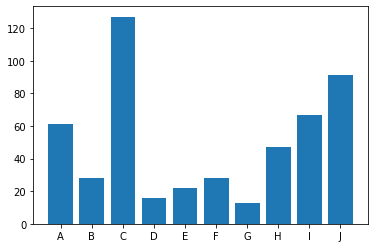

In [11]:
# how many tiles are there in each cluster?
plt.bar(*np.unique(da_clusters, return_counts=True))

## 3. Density-based clustering (OPTICS)

In [12]:
from sklearn.cluster import OPTICS

In [13]:
# run OPTICS clustering with a fixed number of clusters
optics = OPTICS(min_cluster_size=0.01, xi=0.05)

optics.fit(da_embs)

# create an xarray.DataArray to make this array easier to work with
da_embs_optics = xr.DataArray(
    optics.labels_, dims=("tile_id",), coords=dict(tile_id=da_embs.tile_id)
)
da_embs_optics

<xarray.DataArray (tile_id: 500)>
array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  4, -1,
       -1, -1, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1,  2, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1,  0, -1, -1, -1, -1, -1, -1,  0,  3, -1, -1, -1, -1, -1, -1, -1,
        3, -1, -1, -1, -1, -1, -1,  3, -1, -1,  6, -1, -1, -1, -1,  2, -1,
       -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  6, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1, -1,
       -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5, -1,
       -1, -1,  4,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  6, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  6,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1,  6, -1,
       -1, -1, -1, -1, -1, -1, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  5,  3, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1,  5,
       -1, -1, -1, -1, -1, -1, -1,  4, -1, -1, -1, -1, -1, -1,  0,  3, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1,  6,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5, -1, -1, -1,  2, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  4, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  6, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  2,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1])
Coordinates:
  * tile_id  (tile_id) int64 0 1 2 3 4 5 6 7 ... 492 493 494 495 496 497 498 499

<BarContainer object of 8 artists>

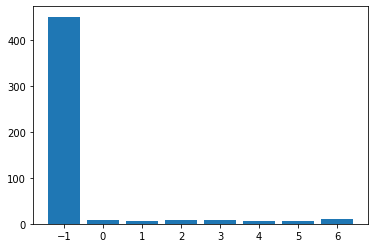

In [14]:
plt.bar(*np.unique(da_embs_optics, return_counts=True))

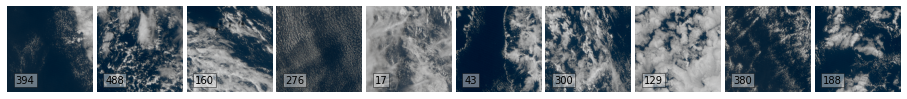

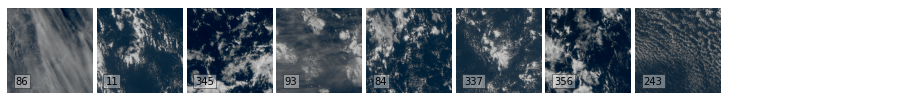

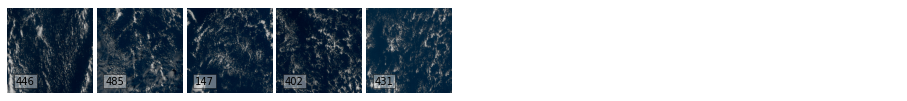

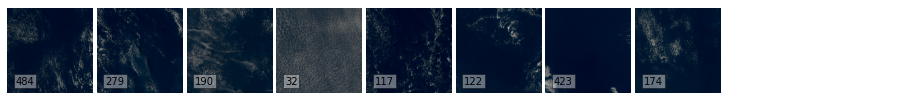

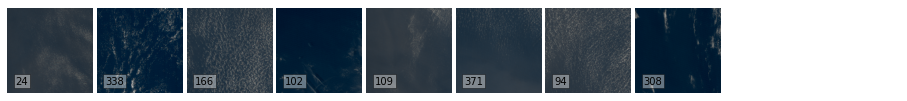

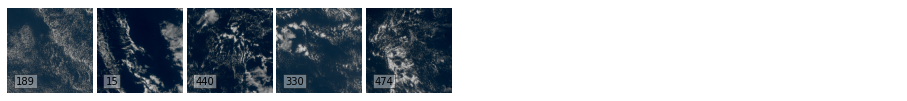

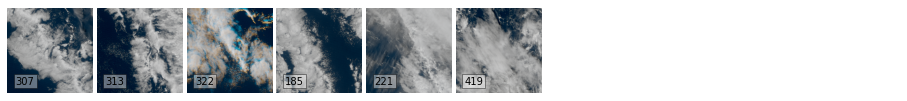

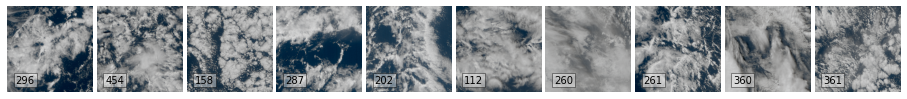

In [15]:
# plot 10 examples from each cluster

for n in np.unique(da_embs_optics):
    idxs_in_cluster = da_embs_kmeans.where(da_embs_optics == n, drop=True).tile_id
    idxs = np.random.choice(
        idxs_in_cluster, min(10, len(idxs_in_cluster)), replace=False
    )
    convml_tt.interpretation.plots.grid_overview(tile_dataset=dataset, points=idxs)

/mnt/big/envs/envs/convml-tt-sense-gpu/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


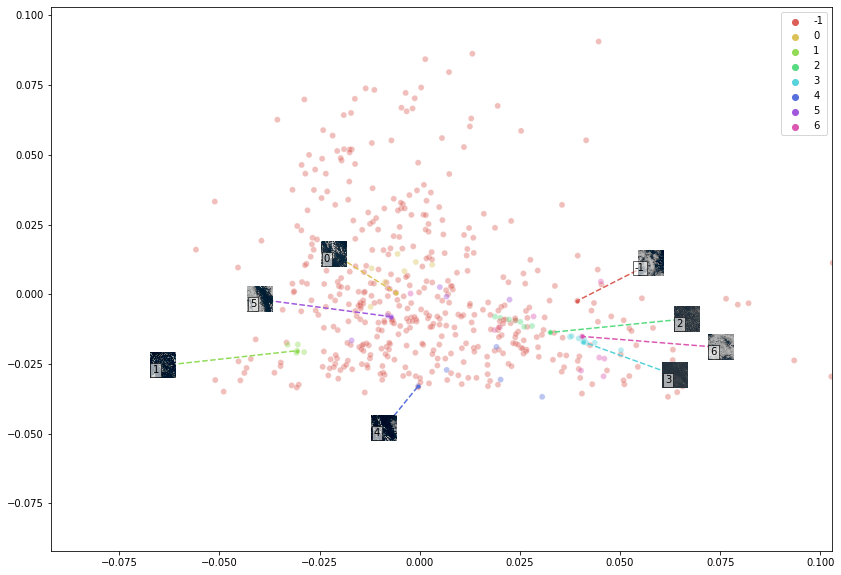

In [16]:
# plot the first two embedding dimensions against each other, annotated with 10 random tiles

fig, ax = plt.subplots(figsize=(14, 10))
x = da_embs.sel(emb_dim=0)
y = da_embs.sel(emb_dim=1)

# construct an array with the index of a tile from each cluster
idxs = np.array(
    [
        da_embs_optics.where(da_embs_optics == n, drop=True).tile_id[0].item()
        for n in np.unique(da_embs_optics)
    ]
)

_ = convml_tt.interpretation.plots.annotated_scatter_plot(
    x, y, points=idxs, ax=ax, hue=da_embs_optics
)

In [17]:
# The parameters I've used considers most of the points as outliers,
# are there better parameters I could use?

### Questions to look at

1. How are the tiles distributed in the embedding space? Is this what you expected? How could this be modified?

2. Are the distinct clusters in the embedding space which represents quite distinct cloud organisation forms? Describe what they look like if so.

3. How do the different clustering methods differ? What are their strengths and weaknesses?